In [1]:
#Exersize 1
import numpy as np
a = np.random.random((10,3))
print(a)
b = (np.arange(10),np.abs(a-0.5).argmin(axis=1))
print(a[b])

[[0.43148531 0.57588058 0.54721407]
 [0.61267365 0.17570043 0.49884987]
 [0.52807004 0.77288318 0.19298654]
 [0.06653301 0.00322211 0.69332508]
 [0.5560489  0.61693567 0.74478267]
 [0.29613842 0.31946423 0.4778419 ]
 [0.92210081 0.87591524 0.21503383]
 [0.97042224 0.18243125 0.7606602 ]
 [0.49372501 0.91174184 0.22975197]
 [0.41090071 0.11416188 0.79113545]]
[0.54721407 0.49884987 0.52807004 0.69332508 0.5560489  0.4778419
 0.21503383 0.7606602  0.49372501 0.41090071]


In [2]:
#Exersize 2
a = np.random.random((6,6))
print(a)
b = (a.sum(axis=1)/a.min(axis=0))
print(b)

[[0.42183239 0.6127992  0.20918556 0.41831708 0.01354764 0.3921    ]
 [0.09163562 0.4890356  0.02973276 0.11229041 0.81357629 0.91501528]
 [0.88198872 0.68316086 0.47538006 0.23105603 0.1666439  0.01795021]
 [0.07987356 0.52824233 0.75087803 0.67297579 0.75973277 0.56479158]
 [0.71053871 0.82358675 0.26004776 0.78802244 0.3658684  0.20161188]
 [0.21722888 0.74223729 0.26860164 0.66491977 0.99154866 0.47136065]]
[ 25.88818997   5.01248981  82.6085416   29.89118972 232.48889599
 186.95582206]


In [3]:
#Exersize 3
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
b = np.array(x[1:][x[:-1]==0])
print(b)
b.max()

[3 0 5]


5

In [4]:
#Exersize 4
x = np.ones(10, dtype=np.int32)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
ii = np.unique(i, return_counts = True)
x[ii[0]]+=ii[1]
print(x)

[2 2 2 2 1 4 1 1 2 1]


In [5]:
#Exersize 5
a = np.arange(16).reshape(4, 4)
print(a)
d = {}
for i in range(7):
    d[i]=[a[j][k] for j in range(4) for k in range(4) if j+k==i]
print(d)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
{0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]}


Number of clasters: 5
Number of koordinates: 2


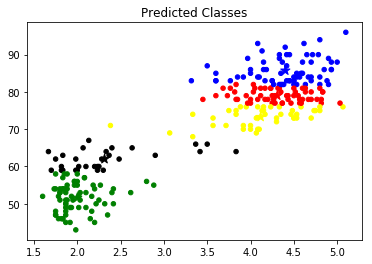

In [40]:
import matplotlib.pyplot as plt

def get_labels(data, centroids):
    copy = centroids-1
    while np.all(copy!=centroids):
        copy = centroids
        dist = [[np.linalg.norm(datas[0:]-centroid[0:]) for datas in data] for centroid in centroids]
        res = np.argmin(dist, axis=0)
        centroids = np.array([np.mean(data[res==i], axis = 0) for i in range(k) if i in res])
        if len(copy)>len(centroids):
            copy = centroids-1
    return [res, centroids]

data = np.loadtxt('faithful.dat', usecols=(1,2))
k = int(input("Number of clasters: "))
n = int(input("Number of koordinates: "))
centroids = data[:k]
[labels, centroids] = get_labels(data, centroids)
plt.scatter(*data.T, c=np.hstack((np.array(["red", "green", "yellow", "black", "blue", "orange"]) for i in range(k//6+1)))[labels], s=20)
plt.scatter(*centroids.T, c=["red", "green", "yellow", "black", "blue", "orange"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()